<a href="https://colab.research.google.com/github/magdalenamorawska/Uczenie-Maszynowe-w-Finansach-/blob/Use-Case-1/case_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
creditcard = '/content/creditcard.csv'
df = pd.read_csv(creditcard)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45646 entries, 0 to 45645
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    45646 non-null  int64  
 1   V1      45646 non-null  float64
 2   V2      45646 non-null  float64
 3   V3      45646 non-null  float64
 4   V4      45646 non-null  float64
 5   V5      45646 non-null  float64
 6   V6      45645 non-null  float64
 7   V7      45645 non-null  float64
 8   V8      45645 non-null  float64
 9   V9      45645 non-null  float64
 10  V10     45645 non-null  float64
 11  V11     45645 non-null  float64
 12  V12     45645 non-null  float64
 13  V13     45645 non-null  float64
 14  V14     45645 non-null  float64
 15  V15     45645 non-null  float64
 16  V16     45645 non-null  float64
 17  V17     45645 non-null  float64
 18  V18     45645 non-null  float64
 19  V19     45645 non-null  float64
 20  V20     45645 non-null  float64
 21  V21     45645 non-null  float64
 22

In [18]:
value_counts = df['Class'].value_counts()
print(value_counts)

0.0    45503
1.0      142
Name: Class, dtype: int64


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

In [30]:
df_cleaned = df.dropna()

In [35]:
X = df_cleaned.drop(columns='Class')
y=df_cleaned['Class']

In [36]:
X_train, X_test = train_test_split (X, test_size=0.33, random_state=42)
y_train, y_test = train_test_split (y, test_size=0.33, random_state=42)

In [38]:
print(X_train.shape, X_test.shape)

(30582, 30) (15063, 30)


In [40]:
print(y_train.shape,y_test.shape)

(30582,) (15063,)


In [26]:
print(train_set.shape, test_set.shape)

(30582, 31) (15064, 31)


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print("accuracy", accuracy)
print("precision", precision)
print("recall", recall)

confusion_matrix(y_test,y_pred)

accuracy 0.9968797716258382
precision 0.8333333333333334
recall 0.09803921568627451


array([[15011,     1],
       [   46,     5]])

In [56]:
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt


In [57]:
oversampler = RandomOverSampler(random_state=42)
X_oversamp, y_oversamp = oversampler.fit_resample(X_train, y_train)
df_oversamp = pd.concat([y_oversamp, X_oversamp], axis=1)

Text(0, 0.5, 'Liczba wystąpień')

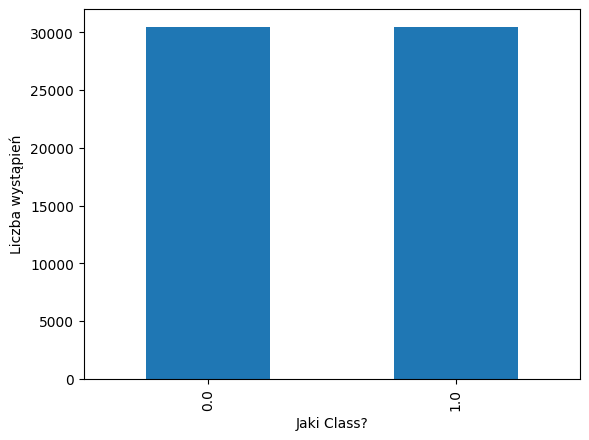

In [58]:
df_oversamp['Class'].value_counts().plot(kind='bar')
plt.xlabel("Jaki Class?")
plt.ylabel("Liczba wystąpień")

In [63]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_oversamp, y_oversamp)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print("accuracy", accuracy)
print("precision", precision)
print("recall", recall)

confusion_matrix(y_test,y_pred)

accuracy 0.9961495054106088
precision 0.40540540540540543
recall 0.29411764705882354


array([[14990,    22],
       [   36,    15]])